In [1]:
%matplotlib notebook
from scipy.stats import rv_continuous
from scipy.special import gamma
import numpy as np
import emcee
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad

from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
import probfit

In [ ]:
path = "/data/POL/HALOB/hydro/output_00417"
#path = "/media/arturo/ARTUROTECA/OUTPUTS/HaloB/output_00417"
myhalo = wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)

In [ ]:
ok,rho,_= CF.getDensity(np.array(myhalo.st.pos3d.reshape(len(myhalo.st.pos3d)*3),dtype=np.float32), myhalo.st.mass)
centro_rho = myhalo.st.pos3d[np.where(rho == rho.max())][0]
print "density",centro_rho
myhalo.center_shift(centro_rho)

In [4]:
myhalo.r_virial(600)

starting
stackted
start histogram


/home/arturo/Documents/git/WKBL/wkbl/astro/galaxy_peeker.py:77: RuntimeWarning: divide by zero encountered in divide
  rho_s = np.cumsum(mhist) / vol_bin


 done
rotated


/home/arturo/Documents/git/WKBL/wkbl/astro/_dark_matter.py:68: RuntimeWarning: invalid value encountered in arccos
  self.theta = np.arccos(np.copy(self.pos3d[:,0]),np.copy(self.r))
/home/arturo/Documents/git/WKBL/wkbl/astro/_stars.py:59: RuntimeWarning: invalid value encountered in divide
  self.vR = (vx*self.pos3d[:,0] + vy*self.pos3d[:,1])/ self.R
/home/arturo/Documents/git/WKBL/wkbl/astro/_stars.py:60: RuntimeWarning: invalid value encountered in divide
  self.vr = (vx*self.pos3d[:,0] + vy*self.pos3d[:,1] + vz*self.pos3d[:,2])/ self.r
/home/arturo/Documents/git/WKBL/wkbl/astro/_stars.py:61: RuntimeWarning: invalid value encountered in divide
  self.vphi = (-vx*self.pos3d[:,1] + vy*self.pos3d[:,0] )/ self.R


| r_200 = 166.9921875
| Diagonal matrix computed 
|    |19, 0, 0|
| D =| 0,14, 0|
|    | 0, 0, 2|


In [5]:
ok,rho_st,_= CF.getDensity(np.array(myhalo.st.pos3d.reshape(len(myhalo.st.pos3d)*3),dtype=np.float32), myhalo.st.mass)

In [6]:
ok,rho_dm,_= CF.getDensity(np.array(myhalo.dm.pos3d.reshape(len(myhalo.dm.pos3d)*3),dtype=np.float32), myhalo.dm.mass)

In [35]:
rmin, rmax, half_delta,bins = 7.5,8.5,0.5,29
shell = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)
ring1 = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)&(np.abs(myhalo.dm.pos3d[:,2])<half_delta)
ring2 = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)&(np.abs(myhalo.dm.pos3d[:,1])<half_delta)
ring3 = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)&(np.abs(myhalo.dm.pos3d[:,0])<half_delta)


h_r1,b_r1 = np.histogram(myhalo.dm.v[ring1],bins=bins)
n_r1 = np.float(len(myhalo.dm.v[ring1]))
w_r1 = b_r1[1] - b_r1[0]
h_r2,b_r2 = np.histogram(myhalo.dm.v[ring2],bins=bins)
n_r2 = np.float(len(myhalo.dm.v[ring2]))
w_r2 = b_r2[1] - b_r2[0]
h_r3,b_r3 = np.histogram(myhalo.dm.v[ring3],bins=bins)
n_r3 = np.float(len(myhalo.dm.v[ring3]))
w_r3 = b_r3[1] - b_r3[0]
bins=102
h_sh,b_sh = np.histogram(myhalo.dm.v[shell],bins=bins)
n_sh = np.float(len(myhalo.dm.v[shell]))
w_sh = b_sh[1] - b_sh[0]


In [36]:
fig, ax = plt.subplots()
ax.plot(b_r1[:-1],h_r1/n_r1/w_r1,label="ring (x-y plane),\n n_tot = {0}".format(int(n_r1)))
ax.plot(b_r2[:-1],h_r2/n_r2/w_r2,label="ring (x-z plane),\n n_tot = {0}".format(int(n_r2)))
ax.plot(b_r3[:-1],h_r3/n_r3/w_r3,label="ring (y-z plane),\n n_tot = {0}".format(int(n_r3)))
ax.plot(b_sh[:-1],h_sh/n_sh/w_sh,label="shell, n_tot = {0}".format(int(n_sh)))


legend = ax.legend(loc='bottom left', ncol=1, shadow=False, fontsize=12)

<IPython.core.display.Javascript object>

In [27]:
rmin, rmax, half_delta,bins = 2.5,3.5,0.5,29
shell = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)
ring1 = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)&(np.abs(myhalo.dm.pos3d[:,2])<half_delta)
ring2 = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)&(np.abs(myhalo.dm.pos3d[:,1])<half_delta)
ring3 = (myhalo.dm.r>rmin)&(myhalo.dm.r<rmax)&(np.abs(myhalo.dm.pos3d[:,0])<half_delta)


h_r1,b_r1 = np.histogram(myhalo.dm.v[ring1],bins=bins)
n_r1 = np.float(len(myhalo.dm.v[ring1]))
w_r1 = b_r1[1] - b_r1[0]
h_r2,b_r2 = np.histogram(myhalo.dm.v[ring2],bins=bins)
n_r2 = np.float(len(myhalo.dm.v[ring2]))
w_r2 = b_r2[1] - b_r2[0]
h_r3,b_r3 = np.histogram(myhalo.dm.v[ring3],bins=bins)
n_r3 = np.float(len(myhalo.dm.v[ring3]))
w_r3 = b_r3[1] - b_r3[0]
h_sh,b_sh = np.histogram(myhalo.dm.v[shell],bins=bins)
n_sh = np.float(len(myhalo.dm.v[shell]))
w_sh = b_sh[1] - b_sh[0]


<IPython.core.display.Javascript object>


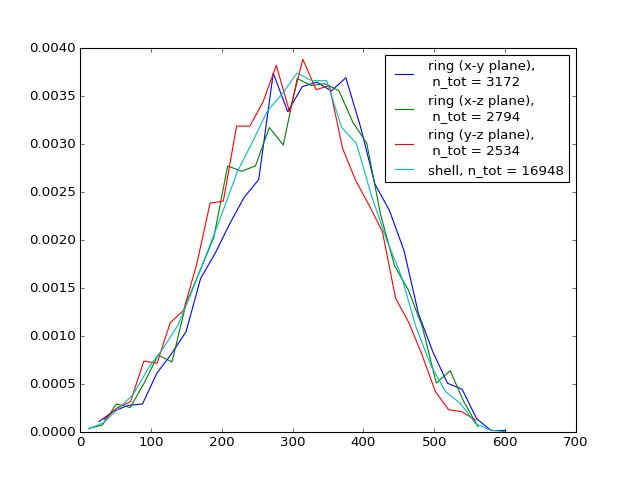

In [28]:
fig, ax = plt.subplots()
ax.plot(b_r1[:-1],h_r1/n_r1/w_r1,label="ring (x-y plane),\n n_tot = {0}".format(int(n_r1)))
ax.plot(b_r2[:-1],h_r2/n_r2/w_r2,label="ring (x-z plane),\n n_tot = {0}".format(int(n_r2)))
ax.plot(b_r3[:-1],h_r3/n_r3/w_r3,label="ring (y-z plane),\n n_tot = {0}".format(int(n_r3)))
ax.plot(b_sh[:-1],h_sh/n_sh/w_sh,label="shell, n_tot = {0}".format(int(n_sh)))


legend = ax.legend(loc='bottom left', ncol=1, shadow=False, fontsize=12)